# Task 2 


*   Import CIFAR-10 
*   Standartise CIFAR-10 


*   Build CNN with 1 convolution


*   Save network as json 


*   Draw metrics


Once the above tasks are done improve network


*   Add more convolutions

Once the above tasks are done improve dataset


*   Generate additional images 
*   Use augmentation methods 









In [1]:
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
import matplotlib.pyplot as plt

In [2]:
#ciar 10 contains 60K images 32x32 pixels
IMG_CHANNELS = 3
IMG_ROWS = 32
IMG_COLS = 32

In [3]:
#constants
BATCH_SIZE = 128
NB_EPOCH = 20
NB_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

In [28]:
#loading dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train_samples')
print(X_test.shape[0], 'test_samples')

X_train shape: (50000, 32, 32, 3)
50000 train_samples
10000 test_samples


In [29]:
#to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES)

In [30]:
#convert to format with floating
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
#network
model = Sequential()
model.add(Conv2D(32, (3,3), padding = 'same', 
input_shape = (IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               4194816   
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0

In [8]:
#training
model.compile(loss = 'categorical_crossentropy', optimizer = OPTIM, metrics = ['accuracy'])
history = model.fit(X_train, Y_train, batch_size = BATCH_SIZE, epochs=NB_EPOCH, validation_split = VALIDATION_SPLIT, verbose = VERBOSE)
score = model.evaluate(X_test, Y_test, batch_size = BATCH_SIZE, verbose = VERBOSE)
print("Test score:", score[0])
print("Test accuracy:", score[1])

Epoch 1/20
313/313 [==============================] - 20s 62ms/step - loss: 1.7052 - accuracy: 0.3945 - val_loss: 1.3672 - val_accuracy: 0.5206
Epoch 2/20
313/313 [==============================] - 19s 62ms/step - loss: 1.3584 - accuracy: 0.5185 - val_loss: 1.4023 - val_accuracy: 0.5114
Epoch 3/20
313/313 [==============================] - 19s 60ms/step - loss: 1.2261 - accuracy: 0.5684 - val_loss: 1.1995 - val_accuracy: 0.5859
Epoch 4/20
313/313 [==============================] - 19s 60ms/step - loss: 1.1378 - accuracy: 0.6011 - val_loss: 1.1165 - val_accuracy: 0.6142
Epoch 5/20
313/313 [==============================] - 19s 61ms/step - loss: 1.0613 - accuracy: 0.6285 - val_loss: 1.1792 - val_accuracy: 0.5978
Epoch 6/20
313/313 [==============================] - 19s 62ms/step - loss: 0.9930 - accuracy: 0.6519 - val_loss: 1.1027 - val_accuracy: 0.6112
Epoch 7/20
313/313 [==============================] - 19s 61ms/step - loss: 0.9379 - accuracy: 0.6733 - val_loss: 1.1072 - val_accuracy:

In [9]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


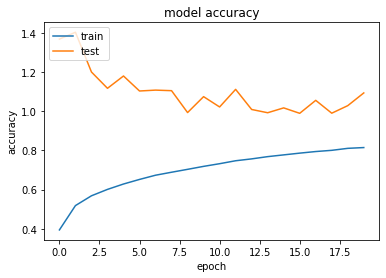

In [10]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

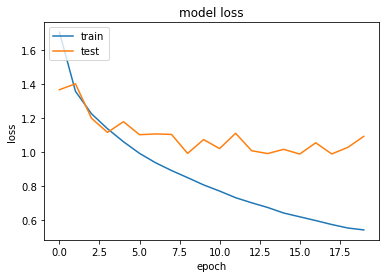

In [11]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [12]:
#save model
model_json = model.to_json()
open('cifar10_architecture.json', 'w').write(model_json)
#weights
model.save_weights('cifar10_weights.h5', overwrite = True)

In [31]:
#new network 
#one of the methods to increase quality of recognition - create a deeper network with several convolutions 
#conv+conv+maxpool+dropout+conv+conv+maxpool

model = Sequential()
 
model.add(Conv2D(32, kernel_size=3, padding='same',
                        input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(Conv2D(32, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
model.add(Conv2D(64, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))

model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_9 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_10 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 64)       

In [14]:
#training
model.compile(loss = 'categorical_crossentropy', optimizer = OPTIM, metrics = ['accuracy'])
history = model.fit(X_train, Y_train, batch_size = BATCH_SIZE, epochs=NB_EPOCH, validation_split = VALIDATION_SPLIT, verbose = VERBOSE)
score = model.evaluate(X_test, Y_test, batch_size = BATCH_SIZE, verbose = VERBOSE)
print("Test score:", score[0])
print("Test accuracy:", score[1])

Epoch 1/20
313/313 [==============================] - 37s 117ms/step - loss: 1.9793 - accuracy: 0.2701 - val_loss: 1.7560 - val_accuracy: 0.3543
Epoch 2/20
313/313 [==============================] - 37s 117ms/step - loss: 1.6408 - accuracy: 0.3968 - val_loss: 1.4843 - val_accuracy: 0.4595
Epoch 3/20
313/313 [==============================] - 37s 119ms/step - loss: 1.4817 - accuracy: 0.4581 - val_loss: 1.5999 - val_accuracy: 0.4495
Epoch 4/20
313/313 [==============================] - 39s 123ms/step - loss: 1.3782 - accuracy: 0.5012 - val_loss: 1.2608 - val_accuracy: 0.5478
Epoch 5/20
313/313 [==============================] - 39s 126ms/step - loss: 1.2940 - accuracy: 0.5349 - val_loss: 1.1778 - val_accuracy: 0.5728
Epoch 6/20
313/313 [==============================] - 42s 134ms/step - loss: 1.2271 - accuracy: 0.5613 - val_loss: 1.2483 - val_accuracy: 0.5472
Epoch 7/20
313/313 [==============================] - 43s 138ms/step - loss: 1.1757 - accuracy: 0.5842 - val_loss: 1.0916 - val_ac

In [15]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


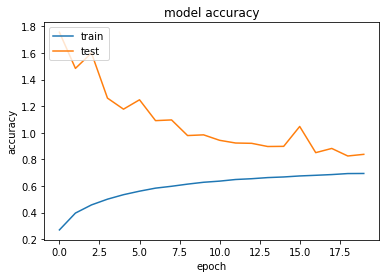

In [16]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

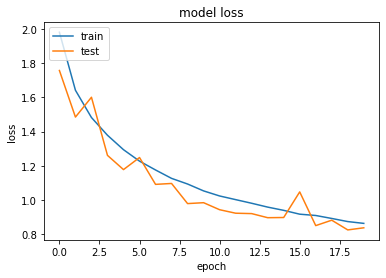

In [17]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [18]:
#save model
model_json = model.to_json()
open('cifar10_architecture.json', 'w').write(model_json)
#weights
model.save_weights('cifar10_weights.h5', overwrite = True)

In [19]:
#augmenting data
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [33]:
#augmentation
#methods adopted from Kaggle and machine learning mastery
print("Augmentating training set images...")
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images)

Augmentating training set images...


In [34]:
datagen.fit(X_train)

In [36]:
#training
model.compile(loss = 'categorical_crossentropy', optimizer = OPTIM, metrics = ['accuracy'])
history = model.fit(X_train, Y_train, batch_size = BATCH_SIZE, epochs=NB_EPOCH, validation_split = VALIDATION_SPLIT, verbose = VERBOSE)
score = model.evaluate(X_test, Y_test, batch_size = BATCH_SIZE, verbose = VERBOSE)
print("Test score:", score[0])
print("Test accuracy:", score[1])

Epoch 1/20
313/313 [==============================] - 37s 117ms/step - loss: 1.9736 - accuracy: 0.2673 - val_loss: 1.8602 - val_accuracy: 0.3213
Epoch 2/20
313/313 [==============================] - 36s 115ms/step - loss: 1.6503 - accuracy: 0.3969 - val_loss: 1.4518 - val_accuracy: 0.4744
Epoch 3/20
313/313 [==============================] - 35s 113ms/step - loss: 1.4917 - accuracy: 0.4563 - val_loss: 1.4224 - val_accuracy: 0.4849
Epoch 4/20
313/313 [==============================] - 41s 130ms/step - loss: 1.3778 - accuracy: 0.5001 - val_loss: 1.2315 - val_accuracy: 0.5572
Epoch 5/20
313/313 [==============================] - 39s 124ms/step - loss: 1.2920 - accuracy: 0.5373 - val_loss: 1.1803 - val_accuracy: 0.5759
Epoch 6/20
313/313 [==============================] - 37s 119ms/step - loss: 1.2226 - accuracy: 0.5646 - val_loss: 1.2177 - val_accuracy: 0.5641
Epoch 7/20
313/313 [==============================] - 38s 120ms/step - loss: 1.1707 - accuracy: 0.5825 - val_loss: 1.1049 - val_ac

In [37]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


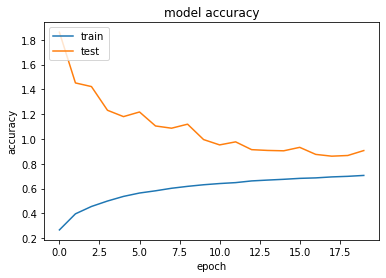

In [38]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

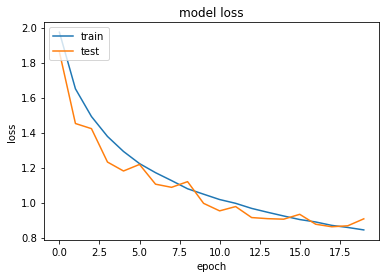

In [39]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [40]:
#save model
model_json = model.to_json()
open('cifar10_architecture.json', 'w').write(model_json)
#weights
model.save_weights('cifar10_weights.h5', overwrite = True)